# RESUME SCREENING

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

An example of such a business is that IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

CREDITS: AMAN KHARWAL (https://thecleverprogrammer.com/2020/12/06/resume-screening-with-python/)

## AUTOMATED EDA

In [65]:
!pip install pandas_profiling --upgrade

Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [66]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

resume = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8', error_bad_lines=False)
resume['cleaned_resume'] = ''
resume.head()

b'Skipping line 1179: expected 2 fields, saw 3\nSkipping line 1181: expected 2 fields, saw 4\n'


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [67]:
resume.shape

(1488, 3)

In [68]:
import pandas_profiling as pf 
pf.ProfileReport(resume)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## MANUAL EDA

In [69]:
# looking at the distinct catogories 
resume['Category'].value_counts()

Testing                                         140
DevOps Engineer                                 110
Python Developer                                 96
Hadoop                                           84
Java Developer                                   84
ETL Developer                                    80
Blockchain                                       80
Operations Manager                               80
Database                                         66
PMO                                              60
Electrical Engineering                           60
DotNet Developer                                 56
Automation Testing                               52
Network Security Engineer                        50
Web Designing                                    45
HR                                               44
Mechanical Engineer                              40
SAP Developer                                    40
Data Science                                     40
Sales       

In [70]:
# Removing the following rows
a = resume[resume['Category'] == 'o Send daily and weekly reports to the team.']
b = resume[resume['Category'] == 'servers.']
c = resume[resume['Category'] == 'o Maintenance of Maven']
print(a)
print(b)
print(c)

                                          Category Resume cleaned_resume
1177  o Send daily and weekly reports to the team.    NaN               
      Category Resume cleaned_resume
1178  servers.    NaN               
                    Category  ... cleaned_resume
1179  o Maintenance of Maven  ...               

[1 rows x 3 columns]


In [71]:
resume.drop([1177,1178,1179],axis=0,inplace=True)
resume.shape

(1485, 3)

Text(0.5, 1.0, 'Types of Catogories')

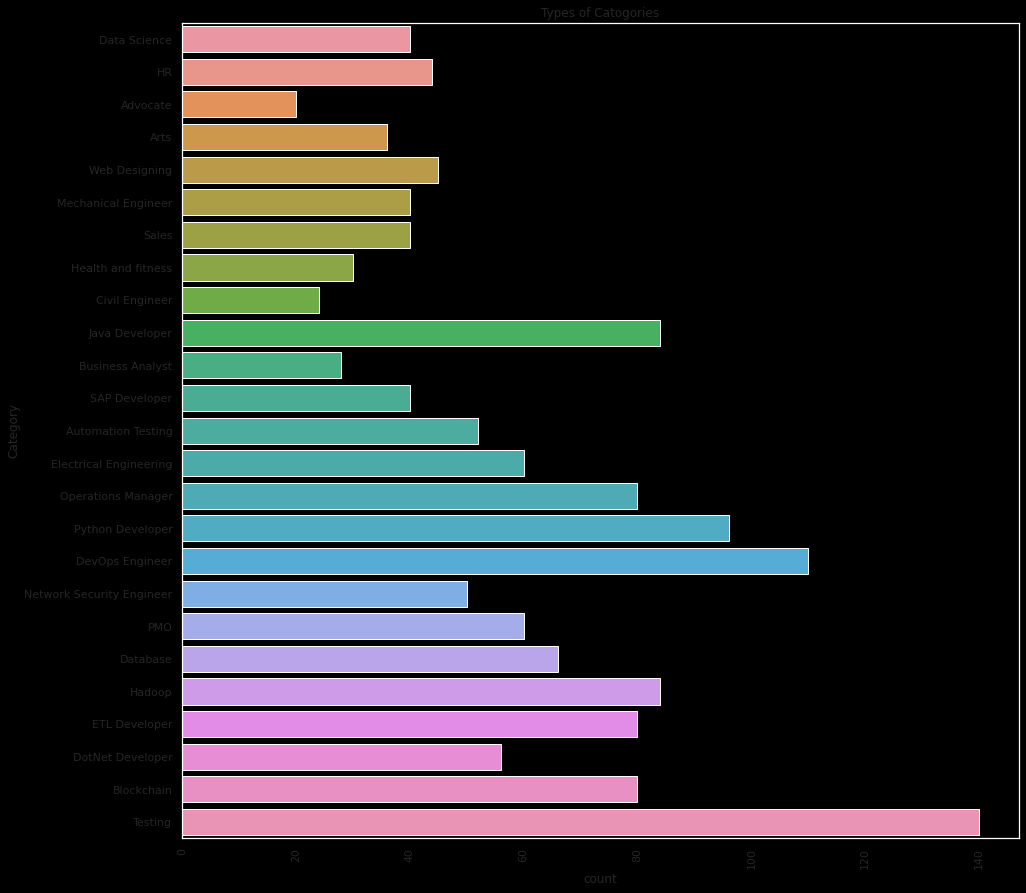

In [72]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid':False})
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category', data=resume).set_title('Types of Catogories')

In [73]:
# removing the urls, hastags, mentions, special letters and punctuations
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', str(resumeText))  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))

resume.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200)]



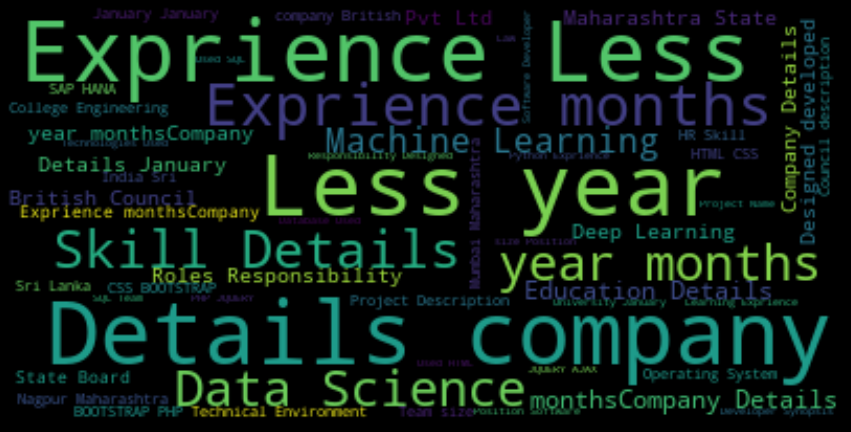

In [74]:
# looking at the frequency of words via wordcloud
# larger the word the more its frequency 

import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import string
from wordcloud import WordCloud

one_set_of_stopwords = set(stopwords.words('english')+['``', "''"])
total_words = []

sentences = resume['Resume'].values

cleaned_sentences = ''

for i in range(0,160):
  cleaned_text = cleanResume(sentences[i])
  cleaned_sentences += cleaned_text
  required_words = nltk.word_tokenize(cleaned_text)

  for word in required_words:
    if word not in one_set_of_stopwords and word not in string.punctuation:
      total_words.append(word)

word_freq_dist = nltk.FreqDist(total_words)
most_common = word_freq_dist.most_common(10)
print(most_common)
print()

wc = WordCloud().generate(cleaned_sentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
# converting these values into catogorical values 

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume[i] = le.fit_transform(resume[i])

In [78]:
resume.head(1)

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...


## MODEL BUILDING

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

required_text = resume['cleaned_resume'].values
print(required_text[0])
print()

required_target = resume['Category'].values
print(required_target[0])
print()

tf = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features = 1500
)

tf.fit(required_text)
word_features = tf.transform(required_text)
print(word_features)
print()

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

In [88]:
# splitting into train and test data set 
x_train, x_test, y_train, y_test = train_test_split(word_features, required_target, random_state=4, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1188, 1500), (297, 1500), (1188,), (297,))

In [95]:
clf = OneVsRestClassifier(KNeighborsClassifier())

clf.fit(x_train, y_train)

pred = clf.predict(x_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print()
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))
print()
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, pred)))

Accuracy of KNeighbors Classifier on training set: 0.99

Accuracy of KNeighbors Classifier on test set: 0.99


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         4
       